# Histogram Uncertainty

This work has been published by **Mehdi Rezvandehy** and **Clayton V. Deutsch** at Springer, [Journal of Natural Resource Research](https://doi.org/10.1007/s11053-016-9322-3) https://doi.org/10.1007/s11053-016-9322-3. **Python** implementation is presented here for calculating correct histogram uncertainty. If you have any question about the approach and implementation, please email rezvande@ualberta.ca.

**There is unavoidable uncertainty in the representative histogram required as an input for geostatistical modeling. This uncertainty should be quantified correctly and incorporated into final modeling because it affects resource/reserve estimation, investment and development decisions. This works confirms a correct approach of quantifying histogram uncertainty by comparing to reference uncertainty found by an automated scan-based approach. Similar patterns of a data configuration are found within a large image and the mean of the specified domain is directly calculated. The correct quantification of histogram uncertainty is defined. The spatial bootstrap provides prior uncertainty that does not consider the domain limits and is not conditioned to the data.  This uncertainty is updated in geostatistical modeling to consider the limits and data. The resulting uncertainty closely matches the scan based approach.**

# Introduction

Developing natural resourcea (mining and hydrocarbone) are risky. The industry aims to predict and mitigate risk. Exploration and production companies shows a decreasing rate of success for exploration and production megaprojects. One of the main reasons for this underperformance is due to use of evaluation methods that do not account for the full uncertainty, which leads to inaccurate production forecasts. In the past, the input statistics were held constant and relatively small fluctuations between realizations were used to characterize reservoir uncertainty. This approach underestimates uncertainty. Uncertainty is small because local fluctuations above and below the average cancel out between locationS. Thus, the uncertainty in input parameters is important and should be integrated into final resource modeling. There are a number of approaches that have been proposed to quantify uncertainty in the univariate distribution (histogram).

The bootstrap is the first simplest method of quantifying uncertainty in the histogram developed. This method uses MCS simulation to draw values from the data distribution to simulate different possible data sets; so, it can be easily applied to calculate the uncertainty in the mean and other statistical parameters. There are two critical assumptions for applying the bootstrap: 1- The distribution of the data should be representative of the whole domain, and 2- The data are independent. The bootstrap may be useful early in appraisal with widely spaced well data.

The spatial bootstrap was proposed in order to consider the spatial correlation of data. The spatial bootstrap in geostatistics applies unconditional simulation at the data locations according to spatial correlation of the data. This approach considers neither the conditioning data nor the area of interest. Increasing spatial correlation  leads to greater uncertainty because the data are more redundant. 

The last technique for assessing uncertainty in the mean is using kriging for estimation of the entire domain. The global kriging variance will decrease when the domain size increases due to the support effect. This technique is independent of data values and leads to relatively low uncertainty.

Khan and Deutsch, 2015 propose a simulation-based approach for quantifying histogram uncertainty. This method transfers the spatial bootstrap uncertainty to posterior uncertainty considering the conditioning data and domain size. They claim that this posterior uncertainty is the correct histogram uncertainty which is between the global kriging uncertainty as lower limit and the spatial bootstrap as an upper limit; this proposal has not been proved in practice. This paper work an experimental framework to evaluate the approaches of quantifying histogram uncertainty.

# Posterior Histogram Uncertainty 

The histogram uncertainty quantified by the spatial bootstrap is assumed to be the prior uncertainty. Considering this prior uncertainty in simulation conditioned to the original data and limited to the domain limits achieves more reliable histogram uncertainty. The result is called posterior histogram uncertainty. The procedure is summarized by:

1. Define a stationary covariance function C($\textbf{h}$).
2. Define the reference distribution $\textit{F(z)}$.	
3. Perform the spatial bootstrap resampling as follows:		
	3-a. Construct the spatial data-to-data covariance matrix $\textbf{C}$. 
	3-b. Compute the Cholesky decomposition of the correlation matrix as $\textbf{C}=\textbf{LL}^{T}$. 		
	3-c. Simulate a vector of uncorrelated standard normal deviate $\textbf{w}$. 		
	3-d. Generate a vector of correlated Gaussian values $\textbf{y}=\textbf{Lw}$. 	 	
	3-e. Transform the unconditional Gaussian values to original units $z(\textbf{u}_{\alpha})=F^{-1}(G(y(\textbf{u}_{\alpha}))),\,\,\,\,\,\alpha=1,...,n$. Where $\textbf{u}_{\alpha}$ is a data location and $n$ is the number of data.		

4. Conditional simulation; the spatial bootstrap realization used as a reference distribution for normal score transformation.	
5. Back transform the realization to original units with the spatial bootstrap reference distribution.	
6. Each realization is limited to the domain limits.	

Steps 3.c to 6 are repeated to achieve the posterior histogram uncertainty. This approach accounts for the conditioning data, the domain limits and the spatial correlation between data.

Figure 1 shows a 2D synthetic data set with in an area of $1000m\times1000m $ with nine data locations. The variable is effective porosity. The uncertainty in the mean of the distribution is calculated by the prior and posterior uncertainty. Sequential Gaussian simulation (SGS) is used for conditional simulation. An anisotropic variogram model is assumed with ranges of 800m for azimuth $0^{\circ}$ and 400m for azimuth $90^{\circ}$. Prior uncertainty in the mean is attained by averaging each realization of the spatial bootstrap. The variance of the mean is $2.11\times 10^{-2}$. Posterior uncertainty in the mean is attained by using each realization of the spatial bootstrap as a reference distribution for normal score transformation of data and back transforming the realizations from the Gaussian space to original units. The mean of each realization is computed. This process is repeated to attain the posterior uncertainty in the mean: the variance of the mean decreases from $2.11\times 10^{-2}$ (prior uncertainty) to $1.43\times 10^{-2}$ because of the conditioning data and domain limits. The posterior histogram uncertainty is claimed to be more accurate than the other techniques. The only way to check the approaches of quantifying histogram uncertainty is to design an experimental framework where the true uncertainty in the histogram is known.

<img src="./Images/fig1.png" alt="drawing" width="700"/>

**Figure 1**: *A synthetic 2D example of effective porosity. The uncertainty in the mean is calculated by prior and posterior uncertainty. The posterior approach leads to lower uncertainty in the mean of effective porosity: the variance of the mean decreases from $2.11\times 10^{-2}$ (prior uncertainty) to $1.43\times 10^{-2}$ because of the conditioning data and domain limits.*




Please see published paper [Geostatistical Modeling with Histogram Uncertainty: Confirmation
of the Correct Approach](https://link.springer.com/article/10.1007/s11053-016-9322-3) for more information. 

In [35]:
import os
os.environ['path']+=";.\\Codes"  # All required codes are in this folder
import sys
sys.path.append
sys.path.append('./Codes')
import pandas as pd
import numpy as np
import matplotlib 
import pylab as plt
from matplotlib import gridspec
from matplotlib.offsetbox import AnchoredText
import zipfile
import matplotlib.patches as patches
from mpl_toolkits.basemap import Basemap
import utm
from IPython.display import clear_output
import geostatspy.GSLIB as GSLIB                         
import geostatspy.geostats as geostats          
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from Codes import*
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First run Appendix that includes all required python function.

# Realistic Example (The Jura Data Set)

A realistic example is considered for calculating uncertainty in the histogram. The Jura data set was collected by Swiss Federal Institute of Technology at Lausanne. There are 359 data locations for concentration of seven heavy metal in the topsoil (Goovaerts 1997). We decluster the variable
nickel (Ni) for this study.  First experimental variogram is calculated for major and minor direction of continuity. Then, uncertainty in the histogram of data (mean and variance) is calculated with the spatial bootstrap as prior uncertainty. Finally the prior uncertainty will go through geostatistical simulation for conditioning and clipping to achieve posterior uncertainty that should be correct uncertainty in the histogram of data.

In [3]:
# Looking at the data 
Data=GSLIB_View('juraset.dat')
display(Data[0:10])

,X,Y,Rock,Land,Cd,Cu,Pb,Co,Cr,Ni,Zn
0,2.386,3.077,3.0,3.0,1.740,25.72,77.36,9.32,38.32,21.32,92.56
1,2.544,1.972,2.0,2.0,1.335,24.76,77.88,10.00,40.20,29.72,73.56
2,2.807,3.347,3.0,2.0,1.610,8.88,30.80,10.60,47.00,21.40,64.80
3,4.308,1.933,2.0,3.0,2.150,22.70,56.40,11.92,43.52,29.72,90.00
4,4.383,1.081,5.0,3.0,1.565,34.32,66.40,16.32,38.52,26.20,88.40
5,3.244,4.519,5.0,3.0,1.145,31.28,72.40,3.50,40.40,22.04,75.20
6,3.925,3.785,5.0,3.0,0.894,27.44,60.00,15.08,30.52,21.76,72.40
7,2.116,3.498,1.0,3.0,0.525,66.12,141.00,4.20,25.40,9.92,72.08
8,1.842,0.989,1.0,3.0,0.240,22.32,52.40,4.52,27.96,11.32,56.40
9,1.709,1.843,3.0,3.0,0.625,18.72,41.60,12.08,33.32,16.88,75.60


In [4]:
Data.describe()

,X,Y,Rock,Land,Cd,Cu,Pb,Co,Cr,Ni,Zn
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,2.962206,2.631279,2.604457,2.509749,1.287401,23.585432,54.630975,9.437855,35.018162,20.018774,75.881894
std,0.979016,1.268629,1.330595,0.761716,0.858027,22.267976,33.097935,3.569146,10.662381,8.093437,30.818669
min,0.491000,0.524000,1.000000,1.000000,0.135000,3.550000,18.680000,1.550000,3.320000,1.980000,25.000000
25%,2.260500,1.510500,2.000000,2.000000,0.652500,10.470000,36.320000,6.660000,27.640000,14.600000,54.600000
50%,3.040000,2.489000,2.000000,3.000000,1.100000,17.200000,46.800000,9.840000,34.800000,20.680000,73.560000
75%,3.674000,3.652000,3.000000,3.000000,1.680000,26.920000,60.200000,12.100000,41.460000,25.380000,90.000000
max,4.920000,5.690000,5.000000,4.000000,5.129000,166.400000,300.000000,20.600000,70.000000,53.200000,259.840000


Figure below shows location map of porosity data with 359 NI samples (left) and histogram of data (right).

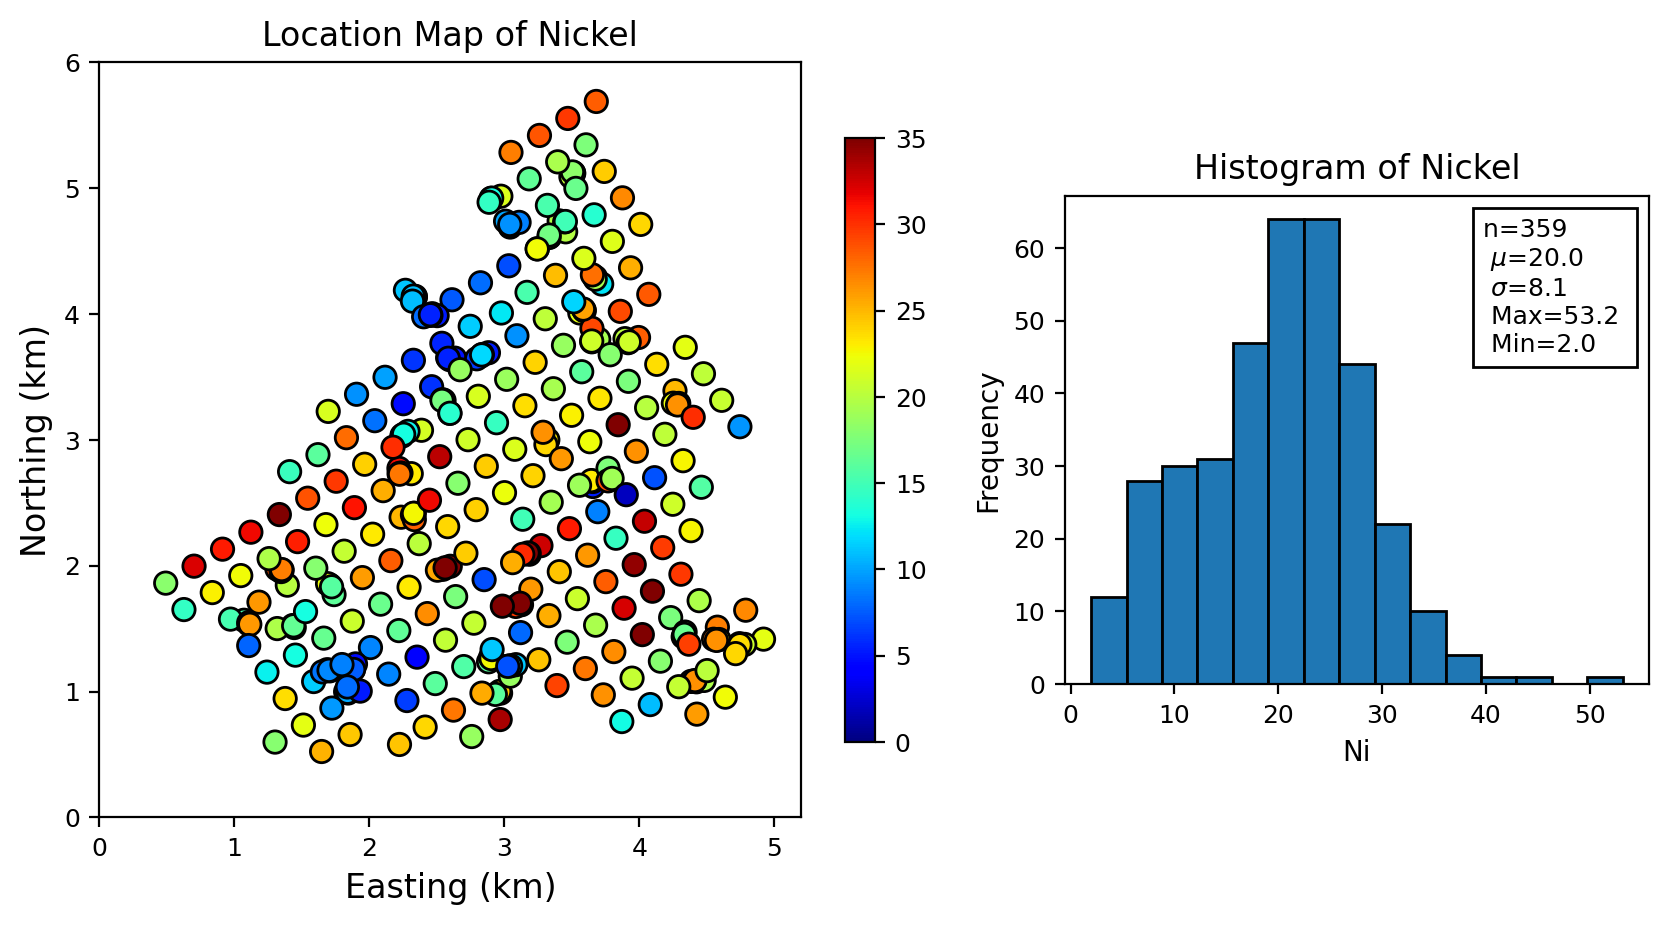

In [5]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(10, 5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 2, width_ratios=[1.5, 1], wspace=0.12)
ax1=plt.subplot(gs[0])
plt.scatter(Data['X'], Data['Y'],c=Data['Ni'],s=65,linewidths=1,edgecolors='k',
            cmap='jet',vmin=0, vmax=35)       

plt.colorbar(shrink=0.8)   
plt.xlabel('Easting (km)',fontsize='12')
plt.ylabel('Northing (km)',fontsize='12')
plt.title('Location Map of Nickel',fontsize=12)
plt.xlim(0,5.2)
plt.ylim(0,6)

ax1=plt.subplot(gs[1]) 
plt.xlabel('Ni',fontsize='10')
plt.ylabel('Frequency',fontsize='10')
plt.hist(Data['Ni'], bins=15,ec='black')
n=len(Data['Ni'])
Mean=np.mean(Data['Ni'])
SD=np.sqrt(np.var(Data['Ni'])) 
Max=np.amax(Data['Ni'])
Min=np.amin(Data['Ni'])
plt.title('Histogram of Nickel',fontsize=12)
plt.gca().set_aspect('0.7')
txt='n=%.0f \n $\mu$=%.1f \n $\sigma$=%.1f \n Max=%.1f \n Min=%.1f'
anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=1)
ax1.add_artist(anchored_text)
plt.show()

# Variogram

In [6]:
#Calculate Experimental Variogram and fitted a Model

#Normal Score Transformation
ns, vr, wt_ns=geostats.nscore(Data, vcol='Ni', wcol=None, ismooth=False, dfsmooth=None, smcol=0, smwcol=0)

#Experimental Variogram with Nromal Score and then fit a theoretical model #############
Data['NS_Ni']=ns
#Azimith 0: Experimental Variogram
tmin=-100;tmax=10000;xlag=0.15;xltol=0.07;nlag=10;azm=0;atol=20;bandwh=20;isill=1
Lag1, Var1, npp_az0=geostats.gamv(Data,'X', 'Y','NS_Ni',tmin,tmax,xlag,xltol,nlag,azm,atol,bandwh,isill)

#Azimith 0: Fitted variogram Model Parameters
nlag=200; xlag=0.01
vario={'nst':2,'nug':0.1, 'cc1':0.45,'it1':1,'azi1':0,'hmaj1':0.35,'hmin1':.35,
     'cc2':0.44,'it2':1,'azi2':0,'hmaj2':1,'hmin2':1}
index_az0,Lag1_fit,Var1_fit,cov_az0,ro_az0=geostats.vmodel(nlag, xlag, azm, vario)

#Azimith 90: Experimental Variogram
tmin=-100;tmax=100;xlag=0.15;xltol=0.07;nlag=10;azm=90;atol=20;bandwh=50;isill=1
Lag2, Var2, npp_az90=geostats.gamv(Data,'X', 'Y','NS_Ni',tmin,tmax,xlag,xltol,nlag,azm,atol,bandwh,isill)
#Fitted Model: Fitted variogram Model Parameters
nlag=200; xlag=0.01
vario={'nst':2,'nug':0.1, 'cc1':0.45,'it1':1,'azi1':0,'hmaj1':0.8,'hmin1':.8,
     'cc2':0.44,'it2':1,'azi2':0,'hmaj2':1.5,'hmin2':1.5}
index_az90,Lag2_fit,Var2_fit,cov_az90,ro_az90=geostats.vmodel(nlag, xlag, azm, vario)
clear_output()

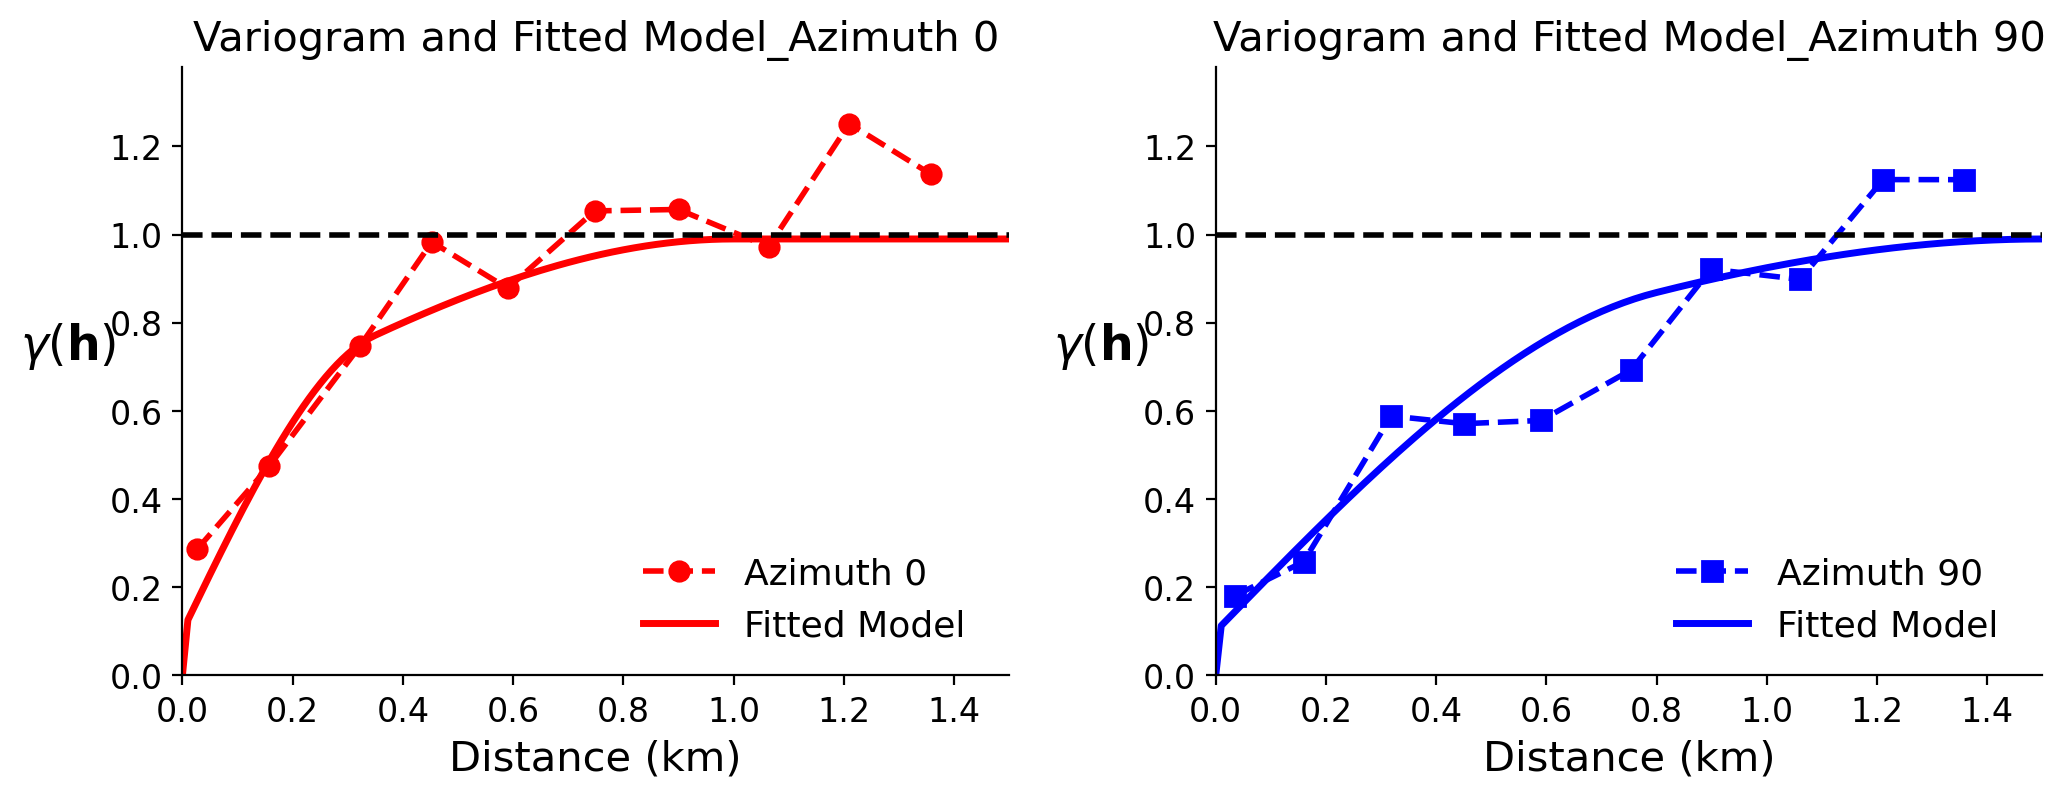

In [7]:
font = {'size'   : 12}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(figsize=(12,12), dpi= 200, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .05, wspace=0.25) 
#   
#Label and Title of Variogram Plot
label1='Azimuth 0 ' ;symbol1='--or';label1_fit='Fitted Model ';symbol1_fit='-r'
label2='Azimuth 90 ';symbol2='--sb';label2_fit='Fitted Model ';symbol2_fit='-b'
xlabl='Distance (km)'; xlim=[0,1.5]; vlim=[0,1.38]; sill=1;loc=4

ax1=plt.subplot(1,2,1) 
#Plot Variograms for Azimith 0
Lag1=np.delete(Lag1, np.where(Var1==0))
Var1=np.delete(Var1, np.where(Var1==0))
plt.plot(Lag1, Var1,symbol1,linewidth=2,markersize=7,label=label1)          
plt.plot(Lag1_fit, Var1_fit,symbol1_fit,linewidth=2.5,label=label1_fit) 
plt.legend(fontsize=13,loc=loc,frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_aspect('0.8')
plt.axhline(y=sill,linewidth=2,color='k',linestyle='--')
title='Variogram and Fitted Model_Azimuth 0'
plt.title(title,fontsize=15)  
plt.xlabel(xlabl,fontsize=15)
ylabl='$\gamma (\mathbf{h}) $'
plt.ylabel(ylabl,rotation=0,fontsize=17,labelpad=15)
plt.xlim(float(xlim[0]),float(xlim[1]))
plt.ylim(float(vlim[0]),float(vlim[1])) 

ax1=plt.subplot(1,2,2) 
#Plot Variogramz for Azimith 90
Lag2=np.delete(Lag2, np.where(Var2==0))
Var2=np.delete(Var2, np.where(Var2==0))
plt.plot(Lag2, Var2,symbol2,linewidth=2,markersize=7,label=label2)          
plt.plot(Lag2_fit, Var2_fit,symbol2_fit,linewidth=2.5,label=label2_fit)      
plt.legend(fontsize=13,loc=loc,frameon=False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().set_aspect('0.8')
plt.axhline(y=sill,linewidth=2,color='k',linestyle='--')
title='Variogram and Fitted Model_Azimuth 90'
plt.title(title,fontsize=15)  
plt.xlabel(xlabl,fontsize=15)
ylabl='$\gamma (\mathbf{h}) $'
plt.ylabel(ylabl,rotation=0,fontsize=17,labelpad=15)
plt.xlim(float(xlim[0]),float(xlim[1]))
plt.ylim(float(vlim[0]),float(vlim[1])) 
clear_output()
plt.show() 

#  Histogram Uncertainty with Spatial Bootstrap (Prior Uncertainty)

In [15]:
x=Data['X']; y=Data['Y']; var=Data['Ni']; seed=256; nsim=100
variog={'nst':2,'nug':0.1, 'cc1':0.45,'it1':1,'azi1':90,'hmaj1':0.8,'hmin1':.35,
     'cc2':0.44,'it2':1,'azi2':90,'hmaj2':1.5,'hmin2':1.0}
outfl="./Spatial Bootstrap/SB"
#
yvec_r, mean=Spatial_Bootstrap(x, y, var, variog, seed, nsim,outfl)

 Effective number of data=  27.82868714324367
 Mean of mean= 20.0511 , Variance of the mean =  2.3473


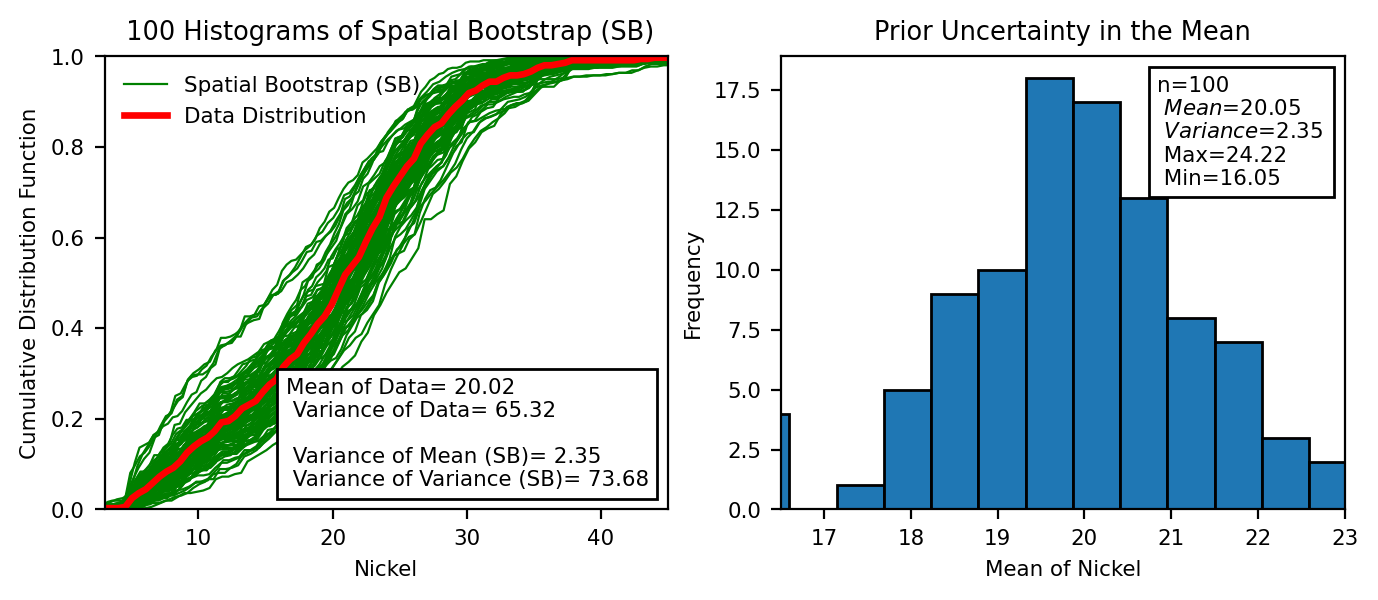

In [16]:
var1=yvec_r;bins=100;label2='Data Distribution';label1='Spatial Bootstrap (SB)';linewidth='0.8'
title=' 100 Histograms of Spatial Bootstrap (SB)';xlabl='Nickel';ylabl='Cumulative Distribution Function';loc=4

font = {'size'   :7.7 }
#
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(8, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1,2,1)
cdf_real(var,var1,nsim,bins,label1,label2,linewidth,title,xlabl,ylabl,xlimt=(3,45),ylimt=(0,1),loc=loc,axt=ax1)
ax2 = plt.subplot(1,2,2)
histplt (mean,15,title='Prior Uncertainty in the Mean',xlabl='Mean of Nickel',xlimt=(16.5,23),ylimt=None,axt=ax2)

# Histogram Uncertainty with Conditional Simulation

In [17]:
#Call SGSIM GSLIB code in Python for variogram declustering

# Parameter file of SGS
for isim in range(nsim):
    txt="                 Parameters for SGSIM \n"\
    +"                      ********************** \n"\
    +"START OF PARAMETERS:\n"\
    +"juraset.dat              -file with data\n"\
    +"1  2  0  10  0  0              -  columns for X,Y,Z,vr,wt,sec.var.\n"\
    +"-998.0       1.0e21           -  trimming limits\n"\
    +"1                             -transform the data (0=no, 1=yes)\n"\
    +"./Simulation/sgsim.trn                     -  file for output trans table\n"\
    +"0                             -  consider ref. dist (0=no, 1=yes)\n"\
    +"./Spatial Bootstrap/SB_"+str(isim+1)+"                  -  file with ref. dist distribution\n"\
    +"1  0                          -  columns for vr and wt\n"\
    +str(min(var))+"    "+str(max(var))+"                  -  zmin,zmax (for tail extrapolation)\n"\
    +"1       4.0                   -  lower tail option (1=linear), parameter\n"\
    +"1      11.5                   -  upper tail option (1=linear), parameter\n"\
    +"1                             -debugging level: 0,1,2,3\n"\
    +"./Simulation/sgsim.dbg                     -file for debugging output\n"\
    +"./Simulation/sgsim_"+str(isim+1)+"                         -file for simulation output\n"\
    +"1                            -number of realizations to generate\n"\
    +"50   0.05   0.1                  -nx,xmn,xsiz\n"\
    +"60   0.05   0.1                -ny,ymn,ysiz\n"\
    +"1    1    1                     -nz,zmn,zsiz\n"\
    +str(10523+isim)+"                         -random number seed\n"\
    +"0     24                      -min and max original data for sim\n"\
    +"24                            -number of simulated nodes to use\n"\
    +"1                             -assign data to nodes (0=no, 1=yes)\n"\
    +"1     3                       -multiple grid search (0=no, 1=yes),num\n"\
    +"0                             -maximum data per octant (0=not used)\n"\
    +"1.2 0.9  1.0                 -maximum search radii\n"\
    +"90   0.0   0.0                 -angles for search ellipsoid\n"\
    +"0     0.60   1.0              -ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC, corr and VRF\n"\
    +"lvmfl.dat                     -  file with LVM, EXDR, or COLC variable\n"\
    +"1                             -  column for secondary variable\n"\
    +"2    0.11                      -nst, nugget effect\n"\
    +"1    0.45  90.0   0.0   0.0     -it,cc,ang1,ang2,ang3\n"\
    +"         0.8  0.35  1.0     -a_hmax, a_hmin, a_vert\n"\
    +"1    0.44  90.0   1.0   0.0     -it,cc,ang1,ang2,ang3\n"\
    +"         1.5  1.0  5.0     -a_hmax, a_hmin, a_vert  \n"   
    #
    f1 = open('temp', "w");
    f1.write(txt)
    f1.close()

    ! echo temp | sgsim
    ! rm temp
    
clear_output()

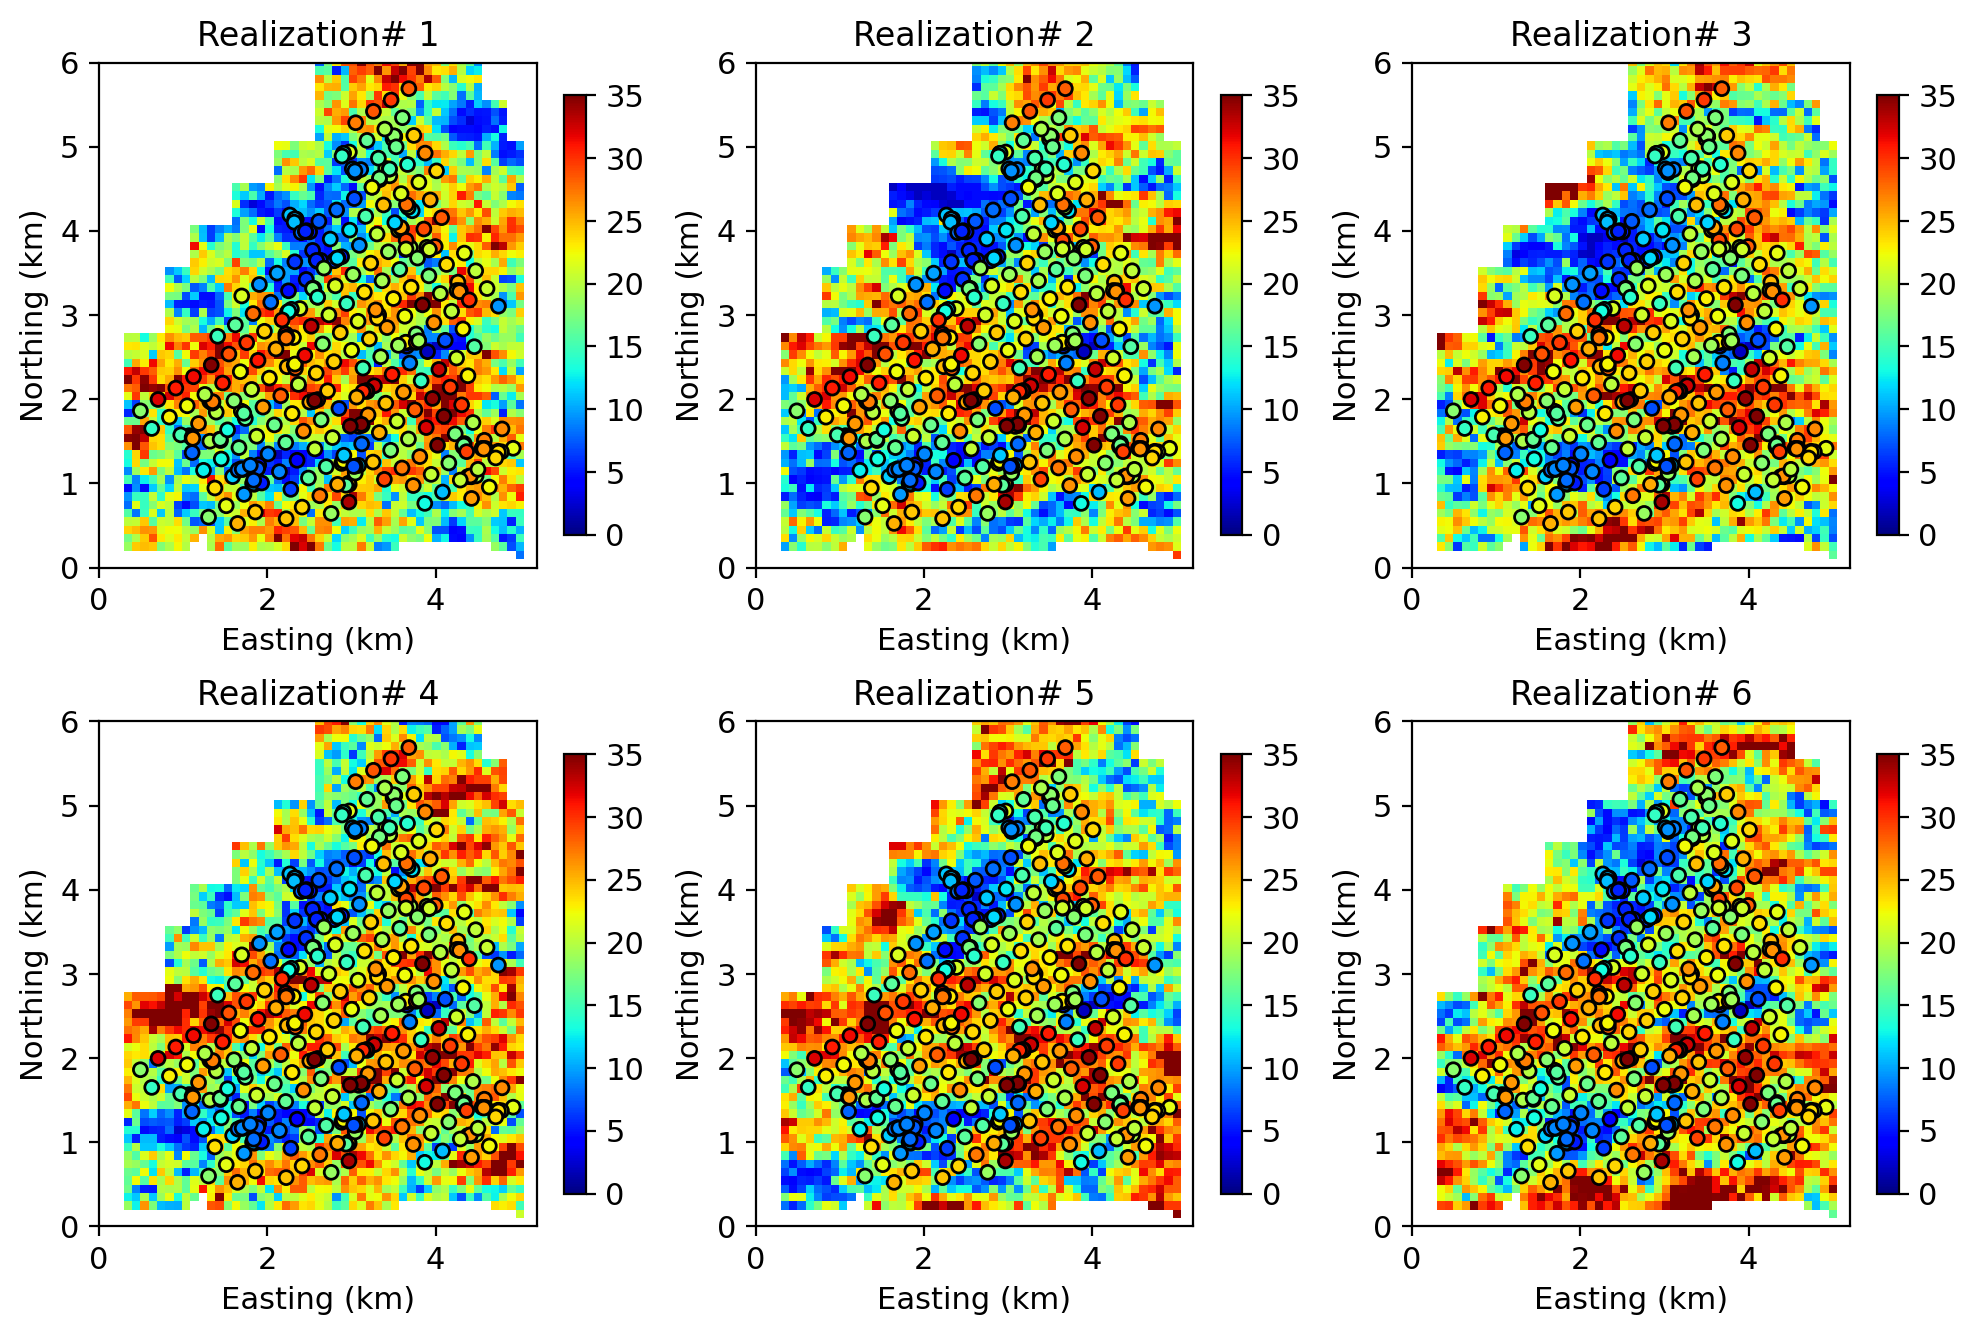

In [18]:
font = {'size'   :11 }
#
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(12, 8), dpi= 200, facecolor='w', edgecolor='k')

# Clip

path=(1,0.1),(0.2,0.1),(0.2,2.7),(0.75,2.7),\
(0.75,3.5),(1,3.5),(1,4),(1.5,4),(1.5,4.5),(2,4.5),(2,5),(2.5,5),(2.5,6),\
(4.5,6),(4.5,5.5),(4.8,5.5),(4.8,5),(5,5),(5,4.2),(5.3,4.2),(5.3,0.75),\
(5,0.75),(5,0),(4.5,0.2),(3.5,0.2),(3.5,0.1),(1.2,0.1),(1.2,0.3),(1,0.1)

path1 = np.asarray(path)
path2 = Path(path1)
patch = PathPatch(path2, facecolor='none',linewidth=1.5)
#
sim=[]; mean_CS=[]
for i in range(nsim):
    df_sim=GSLIB.GSLIB2Dataframe('./Simulation/sgsim_'+str(i+1))
    sim.append(df_sim.to_numpy())
    mean_CS.append(np.mean(df_sim.to_numpy()))
#    
nsim_=6;nx=50; xmn=0.05;xsiz=0.1;ny=60; ymn=0.05;ysiz=0.1                   
for isim in range(nsim_):
    if(isim<6):
        ax1=plt.subplot(2,3,isim+1)
        plt.scatter(Data['X'], Data['Y'],c=Data['Ni'],s=25,linewidths=1,edgecolors='k',
                    cmap='jet',vmin=0, vmax=35)       
        plt.xlabel('Easting (km)',fontsize='11')
        plt.ylabel('Northing (km)',fontsize='11')
        plt.title('Realization# '+str(isim+1),fontsize=12)
        
        sim_clip=np.zeros((ny,nx))
        for j in range(ny):
            for i in range(nx):
                xa=xmn+(i)*xsiz; ya=ymn+(j)*ysiz
                inside=path2.contains_points([(xa,ya)])
                index=i+1 + (j-1+1)*nx 
                if(inside[0]):  
                    sim_clip[j,i]=sim[isim][index-1]
                else:
                    sim_clip[j,i]=np.NAN
                
        im = plt.imshow(sim_clip, extent=(xmn+xsiz/2, xsiz*nx+xmn, ymn+ysiz/2, ysiz*ny+ymn), cmap='jet',
                        origin='lower',interpolation='nearest',vmin=0, vmax=35) 
        plt.xlim(0,5.2)
        plt.ylim(0,6)
        plt.colorbar(shrink=0.8)
        
plt.show()

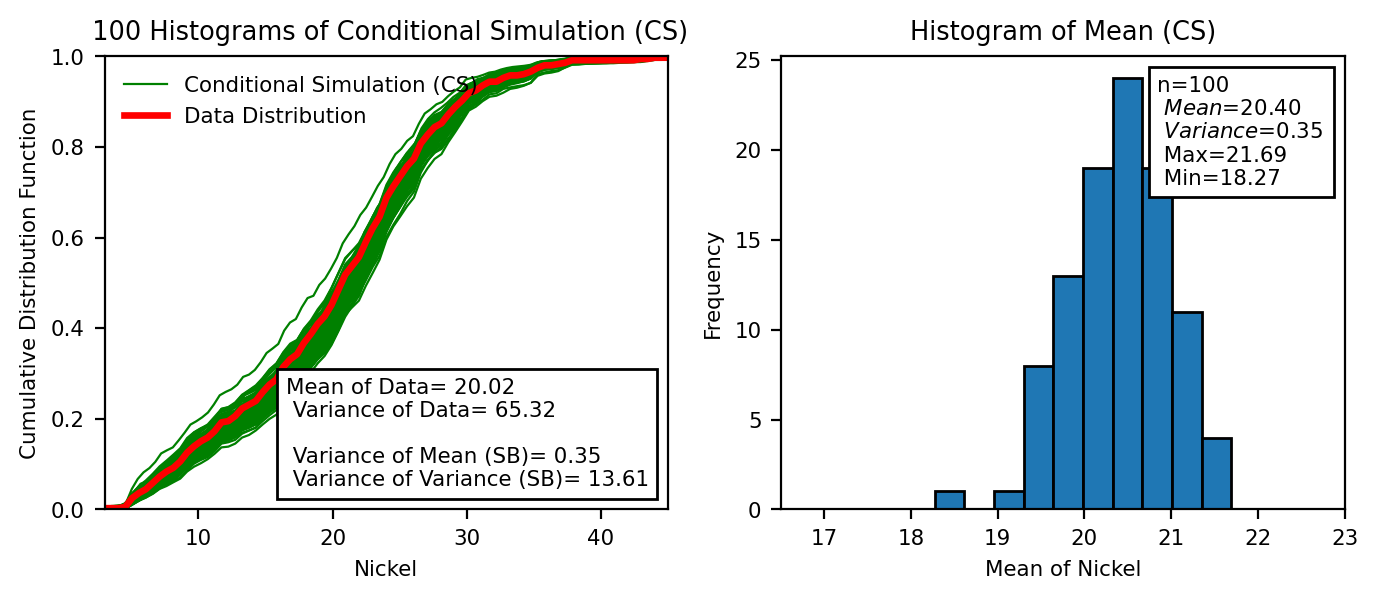

In [19]:
var1=sim;bins=100;label2='Data Distribution';label1='Conditional Simulation (CS)';linewidth='0.8'
title=' 100 Histograms of Conditional Simulation (CS)';xlabl='Nickel';ylabl='Cumulative Distribution Function';loc=4

font = {'size'   :7.7 }
#
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(8, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1,2,1)
cdf_real(var,var1,nsim,bins,label1,label2,linewidth,title,xlabl,ylabl,xlimt=(3,45),ylimt=(0,1),loc=loc,axt=ax1)
ax2 = plt.subplot(1,2,2)
histplt (mean_CS,10,title='Histogram of Mean (CS)',xlabl='Mean of Nickel',xlimt=(16.5,23),ylimt=None,axt=ax2)

# Histogram Uncertainty by Spatial bootstrap and Conditional Simulation (Posterior Uncertainty)

In [20]:
#Call SGSIM GSLIB code in Python for variogram declustering

# Parameter file of SGS
for isim in range(nsim):
    txt="                 Parameters for SGSIM \n"\
    +"                      ********************** \n"\
    +"START OF PARAMETERS:\n"\
    +"juraset.dat              -file with data\n"\
    +"1  2  0  10  0  0              -  columns for X,Y,Z,vr,wt,sec.var.\n"\
    +"-998.0       1.0e21           -  trimming limits\n"\
    +"1                             -transform the data (0=no, 1=yes)\n"\
    +"./Simulation/sgsim.trn                     -  file for output trans table\n"\
    +"1                             -  consider ref. dist (0=no, 1=yes)\n"\
    +"./Spatial Bootstrap/SB_"+str(isim+1)+"                  -  file with ref. dist distribution\n"\
    +"1  0                          -  columns for vr and wt\n"\
    +str(min(var))+"    "+str(max(var))+"                  -  zmin,zmax (for tail extrapolation)\n"\
    +"1       4.0                   -  lower tail option (1=linear), parameter\n"\
    +"1      11.5                   -  upper tail option (1=linear), parameter\n"\
    +"1                             -debugging level: 0,1,2,3\n"\
    +"./Simulation/sgsim.dbg                     -file for debugging output\n"\
    +"./Simulation/sgsim_"+str(isim+1)+"                         -file for simulation output\n"\
    +"1                            -number of realizations to generate\n"\
    +"50   0.05   0.1                  -nx,xmn,xsiz\n"\
    +"60   0.05   0.1                -ny,ymn,ysiz\n"\
    +"1    1    1                     -nz,zmn,zsiz\n"\
    +str(10520+isim)+"                         -random number seed\n"\
    +"0     24                      -min and max original data for sim\n"\
    +"24                            -number of simulated nodes to use\n"\
    +"1                             -assign data to nodes (0=no, 1=yes)\n"\
    +"1     3                       -multiple grid search (0=no, 1=yes),num\n"\
    +"0                             -maximum data per octant (0=not used)\n"\
    +"1.2 0.9  1.0                 -maximum search radii\n"\
    +"90   0.0   0.0                 -angles for search ellipsoid\n"\
    +"0     0.60   1.0              -ktype: 0=SK,1=OK,2=LVM,3=EXDR,4=COLC, corr and VRF\n"\
    +"lvmfl.dat                     -  file with LVM, EXDR, or COLC variable\n"\
    +"1                             -  column for secondary variable\n"\
    +"2    0.11                      -nst, nugget effect\n"\
    +"1    0.45  90.0   0.0   0.0     -it,cc,ang1,ang2,ang3\n"\
    +"         0.8  0.35  1.0     -a_hmax, a_hmin, a_vert\n"\
    +"1    0.44  90.0   1.0   0.0     -it,cc,ang1,ang2,ang3\n"\
    +"         1.5  1.0  5.0     -a_hmax, a_hmin, a_vert  \n"   
    #
    f1 = open('temp', "w");
    f1.write(txt)
    f1.close()

    ! echo temp | sgsim
    ! rm temp
    
clear_output()

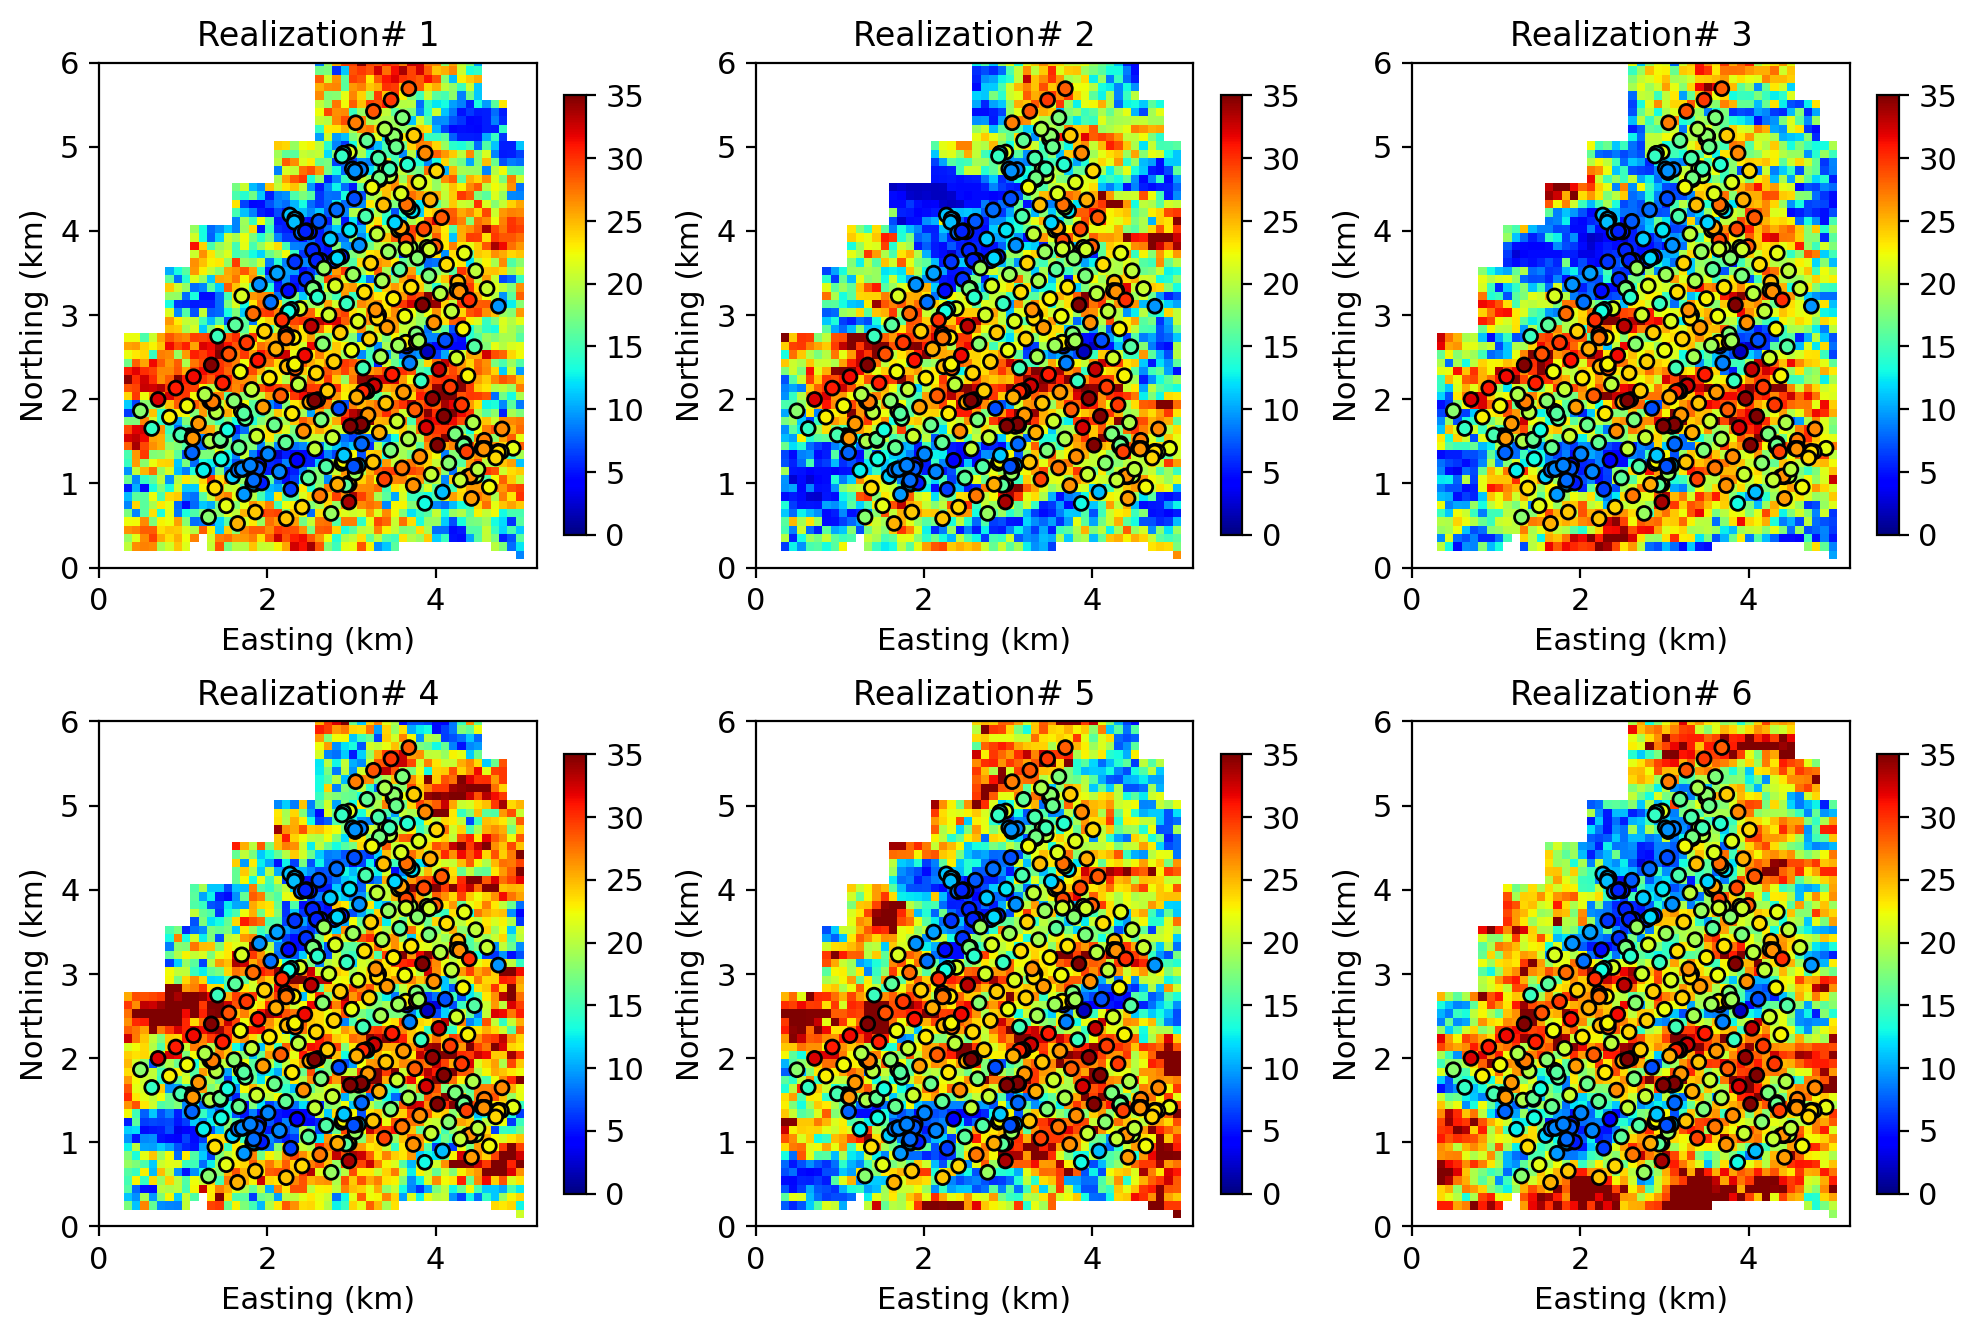

In [93]:
font = {'size'   :11 }
#
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(12, 8), dpi= 200, facecolor='w', edgecolor='k')

# Clip simulation

path=(1,0.1),(0.2,0.1),(0.2,2.7),(0.75,2.7),\
(0.75,3.5),(1,3.5),(1,4),(1.5,4),(1.5,4.5),(2,4.5),(2,5),(2.5,5),(2.5,6),\
(4.5,6),(4.5,5.5),(4.8,5.5),(4.8,5),(5,5),(5,4.2),(5.3,4.2),(5.3,0.75),\
(5,0.75),(5,0),(4.5,0.2),(3.5,0.2),(3.5,0.1),(1.2,0.1),(1.2,0.3),(1,0.1)
path1 = np.asarray(path)
path2 = Path(path1)
patch = PathPatch(path2, facecolor='none',linewidth=1.5)
#
sim=[]; mean_pos=[]
for i in range(nsim):
    df_sim=GSLIB.GSLIB2Dataframe('./Simulation/sgsim_'+str(i+1))
    sim.append(df_sim.to_numpy())
    mean_pos.append(np.mean(df_sim.to_numpy()))
#    
nsim_=6;nx=50; xmn=0.05;xsiz=0.1;ny=60; ymn=0.05;ysiz=0.1                   
for isim in range(nsim_):
    if(isim<6):
        ax1=plt.subplot(2,3,isim+1)
        plt.scatter(Data['X'], Data['Y'],c=Data['Ni'],s=25,linewidths=1,edgecolors='k',
                    cmap='jet',vmin=0, vmax=35)       
        plt.xlabel('Easting (km)',fontsize='11')
        plt.ylabel('Northing (km)',fontsize='11')
        plt.title('Realization# '+str(isim+1),fontsize=12)
        
        sim_clip=np.zeros((ny,nx))
        for j in range(ny):
            for i in range(nx):
                xa=xmn+(i)*xsiz; ya=ymn+(j)*ysiz
                inside=path2.contains_points([(xa,ya)])
                index=i+1 + (j-1+1)*nx 
                if(inside[0]):  
                    sim_clip[j,i]=sim[isim][index-1]
                else:
                    sim_clip[j,i]=np.NAN
                
        im = plt.imshow(sim_clip, extent=(xmn+xsiz/2, xsiz*nx+xmn, ymn+ysiz/2, ysiz*ny+ymn), cmap='jet',
                        origin='lower',interpolation='nearest',vmin=0, vmax=35) 
        plt.xlim(0,5.2)
        plt.ylim(0,6)
        plt.colorbar(shrink=0.8)
        
plt.show()

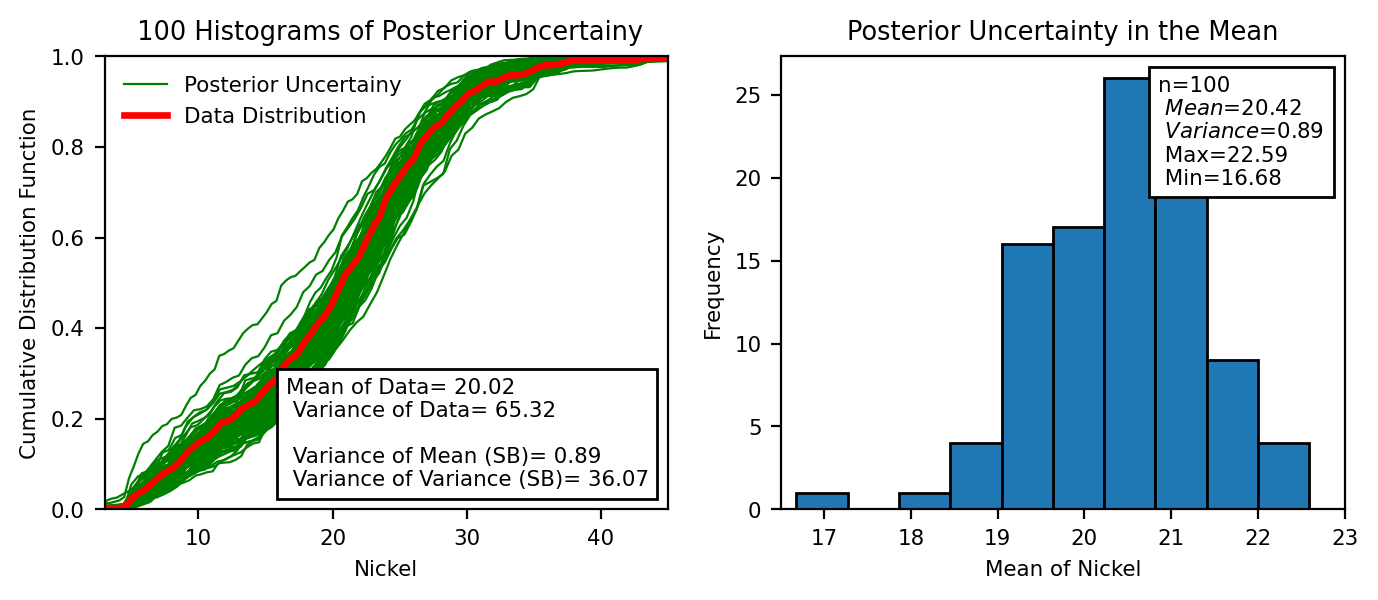

In [22]:
var1=sim;bins=100;label2='Data Distribution';label1='Posterior Uncertainy';linewidth='0.8'
title=' 100 Histograms of Posterior Uncertainy';xlabl='Nickel';ylabl='Cumulative Distribution Function';loc=4

font = {'size'   :7.7 }
#
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(8, 3), dpi= 200, facecolor='w', edgecolor='k')
ax1 = plt.subplot(1,2,1)
cdf_real(var,var1,nsim,bins,label1,label2,linewidth,title,xlabl,ylabl,xlimt=(3,45),ylimt=(0,1),loc=loc,axt=ax1)
ax2 = plt.subplot(1,2,2)
histplt (mean_pos,10,title='Posterior Uncertainty in the Mean',xlabl='Mean of Nickel',xlimt=(16.5,23),ylimt=None,axt=ax2)

# Prior, Conditional Simulation and Posterior Uncertainty in one Plot

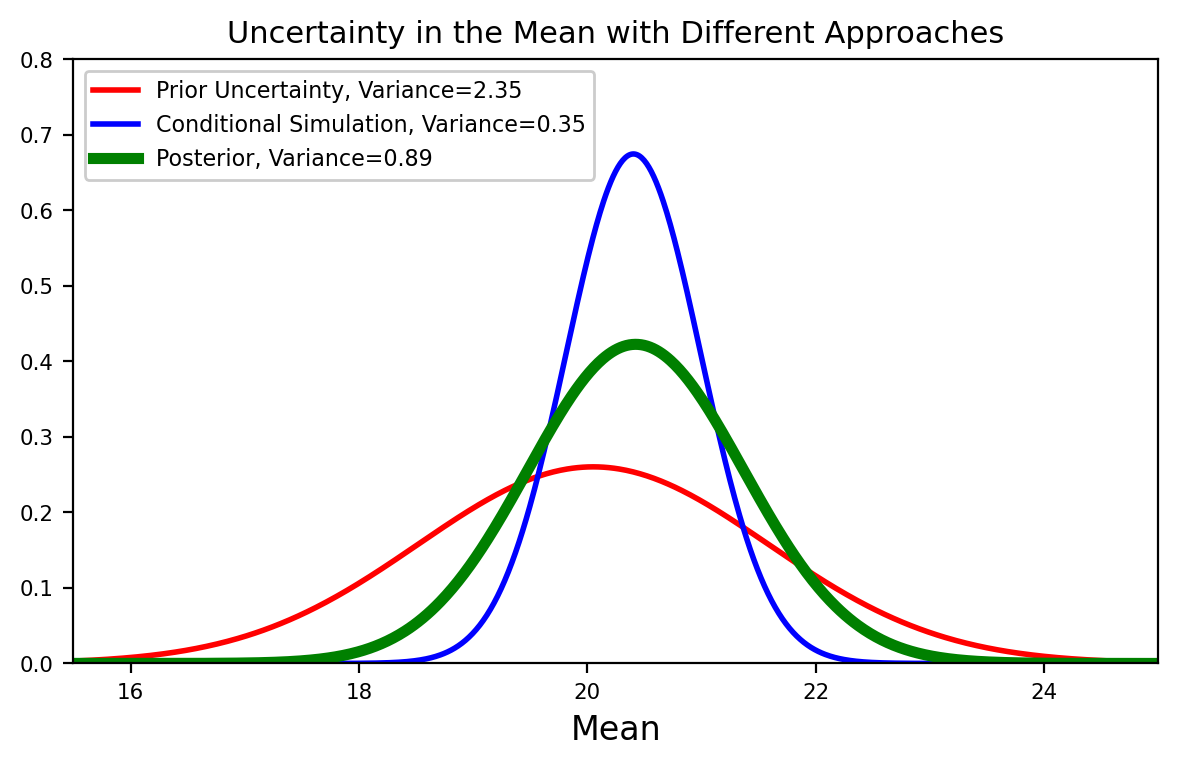

In [92]:
font = {'size'   :7.7 }
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(7, 4), dpi= 200, facecolor='w', edgecolor='k')

# Uncertainty in the Mean with Spatial Bootstrap (Prior Uncertainty)
data = mean
mu, std = norm.fit(data)
# Plot the PDF.
xmin, xmax = min(data),max(data)
x = np.linspace(xmin-2, xmax+5, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2,label='Prior Uncertainty, '+ 'Variance='+str(np.round(std**2,2)))

# Uncertainty in the Mean with Conditional Simulation
data = mean_CS
mu, std = norm.fit(data)
# Plot the PDF.
xmin, xmax = min(data),max(data)
x = np.linspace(xmin-2, xmax+5, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'b', linewidth=2,label='Conditional Simulation, '+ 'Variance='+str(np.round(std**2,2)))

# Uncertainty in the Mean by Conditional Simulation and Bootstrap (Posterior Uncertainty)
data = mean_pos
mu, std = norm.fit(data)
# Plot the PDF.
xmin, xmax = min(data),max(data)
x = np.linspace(xmin-2, xmax+5, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'g', linewidth=4,label='Posterior, '+ 'Variance='+str(np.round(std**2,2)))

plt.xlim((15.5,25))  
plt.ylim(0, 0.8)  
plt.xlabel('Means',fontsize='12')
plt.title('Uncertainty in the Mean with Different Approaches',fontsize='11')
#plt.legend(fontsize='9',framealpha =1, loc=1,bbox_to_anchor=(0.75, -0.1))
plt.legend(fontsize='8',framealpha =1, loc=2)
plt.show()

# Appendix (Required Python Functions) 

In [14]:
def cdf_real(var,var1,nsim,bins,label1,label2,linewidth,title,xlabl,ylabl,xlimt,ylimt,loc,axt=None):
    '''Realization of Cumulative distribution function (cdf)'''
    ax1 = axt or plt.axes()
    Mean_Real=[]
    Var_Real=[]

    for ii in range (nsim+1):
    
    #  plot realizations  
        if ii<nsim:
            Mean_Real.append(np.mean(var1[ii]))
            Var_Real.append(np.var(var1[ii]))    
            counts, bin_edges = np.histogram(var1[ii], bins=bins,density=False)
            cdf = np.cumsum(counts)
            tmp=max(cdf)
            cdf=cdf/float(tmp)
            if (ii==0):
                plt.plot(bin_edges[1:],cdf,color="g",linewidth=linewidth, label=label1)
            else:
                plt.plot(bin_edges[1:],cdf,color="g",linewidth=linewidth)   
                
    #  plot reference distribution     
        if(ii==nsim):
            counts, bin_edges = np.histogram(var, bins=bins,density=False)
            cdf = np.cumsum(counts)
            tmp=max(cdf)
            cdf=cdf/float(tmp)
            plt.plot(bin_edges[1:], cdf,color="r",linewidth=str(float(linewidth)*3), label=label2) 
        Mean_data=np.mean(var)   
        Var_data=np.var(var)  
        
    plt.legend(fontsize=font['size'],loc=2,frameon=False)
    txt='Mean of Data= %.2f \n Variance of Data= %.2f  \n \n Variance of Mean (SB)= %.2f  \n Variance of Variance (SB)= %.2f'  
    anchored_text = AnchoredText(txt %(Mean_data,Var_data,np.var(Mean_Real),np.var(Var_Real)),loc=loc)
    ax1.add_artist(anchored_text)

    try:
        title
    except NameError:
        pass  # do nothing! 
    else:
        plt.title(title,fontsize=font['size']*1.2)   
#
    try:
        xlabl
    except NameError:
        pass  # do nothing! 
    else:
        plt.xlabel(xlabl,fontsize=font['size'])            
#
    try:
        ylabl
    except NameError:
        pass  # do nothing! 
    else:
        plt.ylabel(ylabl,fontsize=font['size'])        
        
    try:
        xlimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.xlim(xlimt)   
#        
    try:
        ylimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.ylim(ylimt)  
        
def histplt (val,bins,title,xlabl,xlimt,ylimt,axt=None):
    '''Plot Histogram of Data'''
    #
    ax1 = axt or plt.axes()
    val=np.array(val)
    try:
        bins
    except NameError:
        plt.hist(val, bins=bins,ec='black')   
    else:
        plt.hist(val, bins=bins,ec='black')      
    n=len(val)
    Mean=np.mean(val)
    SD=np.var(val) 
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $Mean$=%.2f \n $Variance$=%.2f \n Max=%.2f \n Min=%.2f'
    anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=1)
    ax1.add_artist(anchored_text)
    try:
        title
    except NameError:
        plt.title('Histogram',fontsize=font['size']*1.2)    
    else:
        plt.title(title,fontsize=font['size']*1.2)   
#
    try:
        xlabl
    except NameError:
        pass  # do nothing! 
        plt.xlabel('X',fontsize=font['size'])      
    else:
        plt.xlabel(xlabl,fontsize=font['size'])            
#
    plt.ylabel('Frequency',fontsize=font['size'])
#        
    try:
        xlimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.xlim(xlimt)   
#        
    try:
        ylimt
    except NameError:
        pass  # do nothing! 
    else:
        plt.ylim(ylimt)       